In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('C:/develop/jupyter notebook/mtcarsDataset.csv')

In [5]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Text(0.5, 1.0, 'HP vs MPG')

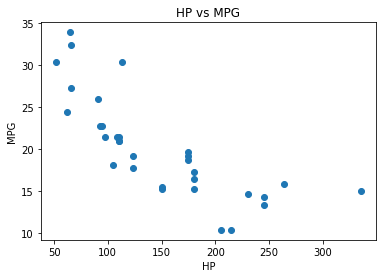

In [6]:
#plotting data
%matplotlib inline  
plt.scatter(data['hp'], data['mpg'])
plt.xlabel('HP')
plt.ylabel('MPG')
plt.title('HP vs MPG')

In [7]:
# basic linear regression
lm = LinearRegression()
x1 = ["hp"]

In [8]:
result1=lm.fit(data[x1],data["mpg"] )

In [9]:
print('Coefficients: \n',lm.coef_, lm.intercept_)

Coefficients: 
 [-0.06822828] 30.098860539622496


In [10]:
#multiple regression
x2=["hp", "wt", "carb"]

result2=lm.fit(data[x2], data["mpg"])

print('Coefficients: \n', lm.coef_, lm.intercept_)

Coefficients: 
 [-0.0299634  -3.89579762 -0.09288048] 37.280862006864936


In [21]:
import statsmodels.api as sm
result = sm.OLS(data['mpg'], data[x2])
result = result.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              26.42
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                    1.94e-08
Time:                        10:34:07   Log-Likelihood:                         -121.68
No. Observations:                  32   AIC:                                      249.4
Df Residuals:                      29   BIC:                                      253.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp            -0.0630      0.054     -1.160      0.255      -0.174       0.048
wt             6.8813      1.907      3.608      0.001       2.980      10.782
carb           1.4947      1.907      0.784      0.440      -2.407       5.396
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.093
Skew:                           0.124   Prob(JB):                        0.955
Kurtosis:                       3.089   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


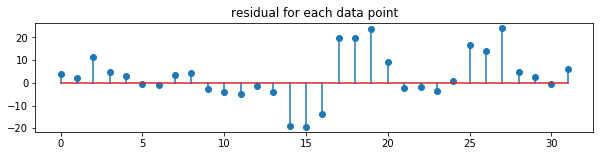

In [25]:
plt.figure(figsize=(10,2))
plt.stem(result.resid)
plt.title("residual for each data point")
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


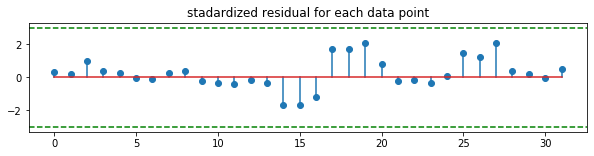

In [26]:
plt.figure(figsize=(10,2))
# figure size를 10이랑 2로 하겠다. 가로 세로의 길이를 뜻하는 것이래. 정사각형으로 하고 싶으면 (10,10).

plt.stem(result.resid_pearson) #표준화 잔차

plt.axhline(3, c="g", ls="--")
# outlier 정도의 최대치를 3까지 허용
# color는 green
# 라인은 -- 형태

plt.axhline(-3, c="g", ls="--")
# outlier 정도의 최저치를 -3까지 허용
# color는 green
# 라인은 -- 형태

plt.title("stadardized residual for each data point")
plt.show()